In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import random as rand

In [2]:
def plot(X):
    plt.figure(figsize = (5,2))
    plt.hist(X, bins = 15, alpha = 0.5, label = "Stabe distribution")
    plt.legend()
    plt.show()

# a-stable distribution

In [22]:
def stable(alpha, beta, gamma, delta, n):
    Theta = np.random.uniform(-np.pi/2, np.pi/2, n)
    W = np.random.exponential(1, n)
    theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2))/alpha
    if alpha != 1:
        Z = np.sin(alpha * (theta_0 + Theta))/(np.cos(alpha * theta_0) * np.cos(Theta))**(1/alpha) * (np.cos(alpha * theta_0 + (alpha - 1) * Theta) / W)**((1-alpha) / alpha)
        X = gamma * Z + delta
    else:
        Z = 2/np.pi * ((np.pi/2 + beta * Theta) * np.tan(Theta) - beta * np.log((np.pi/2 * W * np.cos(Theta)) / (np.pi/2 + beta * Theta)))
        X = gamma * Z + delta + beta * 2/np.pi * gamma * np.log(gamma)
    return X

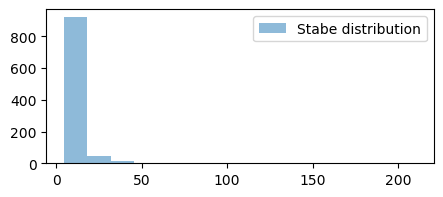

In [23]:
n = 1000
alpha = 0.9
beta = 1
gamma = 1
delta = 0

Z = stable(alpha, beta, gamma, delta, n)
plot(Z)

# a-stable vector

In [24]:
def stable_vector(Zs, gammas, ss, d):
    Xs = []
    n = len(gammas)
    for i in range(d):
        X = []
        if alpha == 1:
            for j in range(n):
                X.append(gammas[j] * (Zs[j] + 2/np.pi * np.log(gammas[j])) * ss[j][i])
            Xs.append(sum(X))
        else:
            for j in range(n):
                X.append(np.power(gammas[j], 1/alpha) * Zs[j] * ss[j][i])
            Xs.append(sum(X))
    return Xs

In [25]:
gammas = [0.25, 0.125, 0.25, 0.25, 0.125, 0.25]
ss = [[1, 0], 
      [1/2, np.sqrt(3)/2], 
      [-1/2, np.sqrt(3)/2],
      [-1, 0],
      [-1/2, -np.sqrt(3)/2],
      [1/2, -np.sqrt(3)/2]]
d = 2
alpha = 0.9

n = 10000
beta = 1
gamma = 1
delta = 0

In [36]:
Zs = [stable(alpha, beta, gamma, delta, n) for _ in gammas]
Xs = stable_vector(Zs, gammas, ss, d)

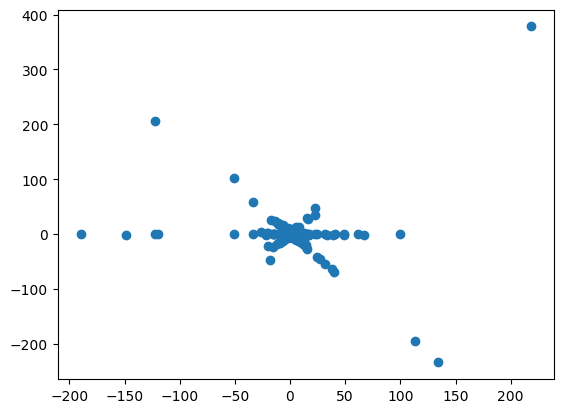

In [37]:
plt.scatter(Xs[0], Xs[1])

In [39]:
gammas = [0.1, 0.3, 0.1, 0.3, 0.1]
ss = [[1, 0], 
      [np.sqrt(3)/2, 1/2], 
      [1/2, np.sqrt(3)/2],
      [0, 1],
      [-1/2, np.sqrt(3)/2]]
d = 2
alpha = 1.6

n = 10000
beta = 1
gamma = 1
delta = 0

In [40]:
Zs = [stable(alpha, beta, gamma, delta, n) for _ in gammas]
Xs = stable_vector(Zs, gammas, ss, d)

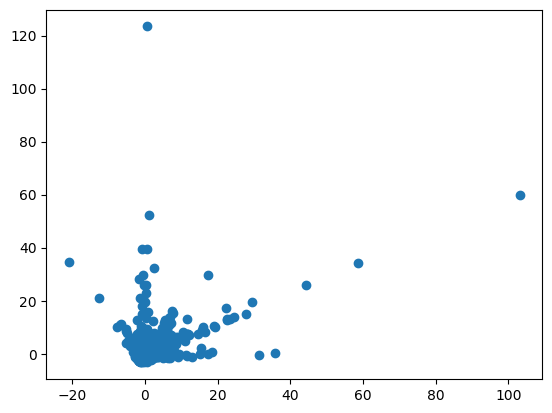

In [41]:
plt.scatter(Xs[0], Xs[1])

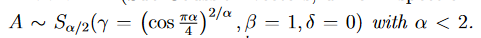

In [42]:
alpha = 1.5
beta = 1
gamma = (np.cos(np.pi * alpha / 4))**(2/alpha)
delta = 1
n = 10000
A = stable(alpha/2, beta, gamma, delta, n)

In [43]:
A

array([1.82749754, 4.22411473, 2.42251731, ..., 1.41350092, 3.0867201 ,
       3.06784269])